In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils.validation import check_random_state
import matplotlib.pyplot as plt
import seaborn as sns

# Set print format
np.set_printoptions(
    precision=4,
    suppress=True
)
# rng = check_random_state(42)

In [ ]:
def spectral_radius(matrix: np.ndarray) -> float:
    """Calculate spectral radius of a matrix"""
    # The spectral radius is the maximum absolute value of the eigenvalues
    return max(abs(np.linalg.eigvals(matrix)))

def check(matrix: np.ndarray) -> bool:
    """Check if matrix is positive semi-definite, symmetric,
    and has spectral radius < 1
    """
    print('Checking matrix...')
    is_valid = True

    # Ensure the matrix is square
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError('Matrix must be square')

    if not np.allclose(matrix, matrix.T):
        print(' - Not symmetric')
        is_valid = False

    if not np.all(np.linalg.eigvals(matrix) >= 0):
        print(' - Not positive semi-definite')
        is_valid = False

    if spectral_radius(matrix) >= 1:
        print(' - Spectral radius >= 1')
        is_valid = False

    if is_valid:
        print(' -> Matrix is positive semi-definite, symmetric, and has spectral radius < 1')
    return is_valid

### Approximate matrix inverse using Neumann series


$$A^{-1} \approx \sum_{k=0}^{l}(I-A)^{k}.$$

Converge when $\|I-A\|_2 < 1$, or $\|A\|_2 < 1$.

In [ ]:
def neumann_approx(matrix: np.ndarray, l: int = 3) -> np.ndarray:
    """Calculate approximation of the inverse of matrix, using Neumann series"""
    matrix_approx = np.zeros_like(matrix)
    I = np.eye(matrix.shape[0])
    for k in range(l):
        matrix_approx += np.linalg.matrix_power(I - matrix, k)

    return matrix_approx

In [ ]:
def simulate(matrix: np.ndarray, l: int, verbose: int = 2) -> None:
    """Simulate Neumann approximation of the inverse of matrix with order l"""
    matrix_approx = neumann_approx(matrix, l)
    if verbose >= 0:
        print(f'* Approximate inverse of matrix with order-{l}:\n', matrix_approx)
    if verbose >= 1:
        print(f' - matrix x matrix_approx:\n{np.dot(matrix, matrix_approx)}')

In [ ]:
def matrix_info(matrix: np.ndarray) -> None:
    """Display infos of matrix"""
    print("Generated matrix:\n", matrix)
    check(matrix)
    print('Inverse of matrix:\n', np.linalg.inv(matrix))

#### Spectral radius < 1

In [ ]:
# def generate_positive_definite_matrix(size):
#     rng = check_random_state(0)
#     A = rng.randn(size, size//2)
#     A = A.dot(A.T)
#     A += np.diag(rng.uniform(low=0.01, high=0.1, size=size))
#     # A += np.eye(size)

#     # Normalize to ensure the spectral radius is less than 1
#     A = A / (max(np.linalg.eigvals(A)) + 1)
#     return A

# d = 4
# matrix = generate_positive_definite_matrix(d)
# matrix_info(matrix)
# simulate(matrix, 5)
# simulate(matrix, 15)

In [ ]:
def generate_pd_matrix(size: int, seed: int = 0):
    """
    Generate a positive definite symmetric matrix A such that
    the spectral radius of (I - A) is less than 1.
    """
    # Set random seed for reproducible
    rng = check_random_state(seed)

    # Create a random symmetric positive definite matrix
    # A = rng.rand(size, size)
    # A = (A + A.T) / 2
    A = rng.randn(size, size//2)
    A = A.dot(A.T)
    A += size * np.eye(size)  # Ensure positive definiteness

    # Rescale A so that max eigenvalue of A is less than 1
    A = A / (max(np.linalg.eigvals(A)) + 1)
    return A

d = 4
matrix = generate_pd_matrix(d)
matrix_info(matrix)
check(matrix)
simulate(matrix, 5)

Generated matrix:
 [[ 0.5274  0.1902  0.2106  0.1172]
 [ 0.1902  0.7237 -0.0263  0.0428]
 [ 0.2106 -0.0263  0.6123  0.1394]
 [ 0.1172  0.0428  0.1394  0.3572]]
Checking matrix...
 -> Matrix is positive semi-definite, symmetric, and has spectral radius < 1
Inverse of matrix:
 [[ 2.5618 -0.6765 -0.809  -0.4433]
 [-0.6765  1.5767  0.3214 -0.0926]
 [-0.809   0.3214  2.0563 -0.5757]
 [-0.4433 -0.0926 -0.5757  3.1807]]
Checking matrix...
 -> Matrix is positive semi-definite, symmetric, and has spectral radius < 1
* Approximate inverse of matrix with order-5:
 [[ 2.1731 -0.5043 -0.5922 -0.3256]
 [-0.5043  1.491   0.1981 -0.0799]
 [-0.5922  0.1981  1.8334 -0.4146]
 [-0.3256 -0.0799 -0.4146  2.632 ]]
 - matrix x matrix_approx:
[[ 0.8873  0.05    0.0628  0.0341]
 [ 0.05    0.9745 -0.0352  0.0038]
 [ 0.0628 -0.0352  0.9349  0.0466]
 [ 0.0341  0.0038  0.0466  0.8408]]


Approximation order-25, tolerate < 0.001:
 [[ 2.5613 -0.6763 -0.8088 -0.4432]
 [-0.6763  1.5766  0.3212 -0.0926]
 [-0.8088  0.3212  2.0561 -0.5755]
 [-0.4432 -0.0926 -0.5755  3.1801]]
From now on, tolerate always < 1


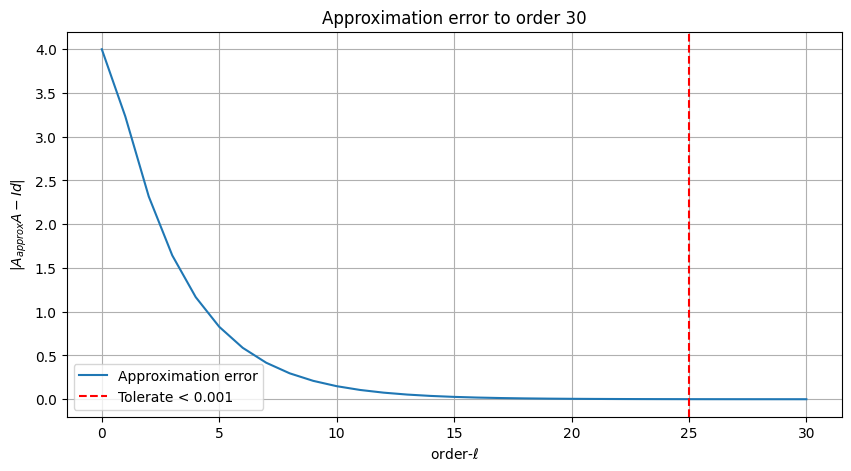

In [ ]:
order = 30
good_approx_order = None
errors = []
tol = 1e-3
I = np.eye(matrix.shape[0])
for l in range(order+1):
    matrix_approx = neumann_approx(matrix, l)
    error = np.sum(np.abs(np.dot(matrix, matrix_approx) - I))
    errors.append(error)
    if good_approx_order is not None:
        continue
    if error <= tol:
        good_approx_order = l
        print(f'Approximation order-{l}, tolerate < {tol}:\n', matrix_approx)
        print('From now on, tolerate always < 1')

plt.figure(figsize=(10, 5))
plt.plot(errors, label='Approximation error')
if good_approx_order is not None:
    plt.axvline(good_approx_order, linestyle='--',
                color='r', label=f'Tolerate < {tol}')
    plt.legend()
plt.xlabel('order-$\ell$')
plt.ylabel('$|A_{approx} A - Id|$')
plt.title(f'Approximation error to order {order}')
plt.grid()
plt.show()

#### Spectral radius >= 1



In [ ]:
rng = check_random_state(0)
B = rng.randn(d, d//2)
cov = B.dot(B.T) + np.diag(rng.uniform(low=0.01, high=0.1, size=d))
while spectral_radius(cov) < 1:
    B = rng.randn(d, d//2)
    cov = B.dot(B.T) + np.diag(rng.uniform(low=0.01, high=0.1, size=d))

matrix_info(cov)
simulate(cov, 5, verbose=0)
simulate(cov, 10, verbose=0)

Generated matrix:
 [[ 3.3687  2.6233  2.9034  1.6154]
 [ 2.6233  6.024  -0.3621  0.5907]
 [ 2.9034 -0.3621  4.5241  1.9223]
 [ 1.6154  0.5907  1.9223  0.9832]]
Checking matrix...
 - Spectral radius >= 1
Inverse of matrix:
 [[ 7.3947 -3.1854 -3.8478 -2.7132]
 [-3.1854  1.7476  2.4012 -0.5109]
 [-3.8478  2.4012  4.7814 -4.4688]
 [-2.7132 -0.5109 -4.4688 14.5193]]
* Approximate inverse of matrix with order-5:
 [[1258.8874 1121.6934 1026.5792  594.5156]
 [1121.6934 1321.8698  698.0011  474.2211]
 [1026.5792  698.0011  997.5838  526.3773]
 [ 594.5156  474.2211  526.3773  296.5561]]
* Approximate inverse of matrix with order-10:
 [[-37662233.0927 -34544792.3638 -30204991.0752 -17687579.3177]
 [-34544792.3638 -32576285.0833 -27082934.9851 -16061392.9741]
 [-30204991.0752 -27082934.9851 -24658378.5944 -14298542.1324]
 [-17687579.3177 -16061392.9741 -14298542.1324  -8336233.597 ]]


#### Code from paper:

https://github.com/marineLM/NeuMiss_sota/blob/master/src/generate_example_dataset.py

In [ ]:
# Data is generated by a linear model, with multivariate Gaussian distribution
from scipy.stats import multivariate_normal
def generate_data(d):
    rng = check_random_state(0)

    n = 10

    B = rng.randn(d, d//2)
    cov = B.dot(B.T) + np.diag(rng.uniform(low=0.01, high=0.1, size=d))

    matrix_info(cov)
    simulate(cov, 5, verbose=0)
    simulate(cov, 10, verbose=0)

    mean = rng.randn(d)
    X = rng.multivariate_normal(
        mean=mean, cov=cov, size=n, check_valid='raise'
    )

    return X

X = generate_data(4)
# X

Generated matrix:
 [[ 3.3687  2.6233  2.9034  1.6154]
 [ 2.6233  6.024  -0.3621  0.5907]
 [ 2.9034 -0.3621  4.5241  1.9223]
 [ 1.6154  0.5907  1.9223  0.9832]]
Checking matrix...
 - Spectral radius >= 1
Inverse of matrix:
 [[ 7.3947 -3.1854 -3.8478 -2.7132]
 [-3.1854  1.7476  2.4012 -0.5109]
 [-3.8478  2.4012  4.7814 -4.4688]
 [-2.7132 -0.5109 -4.4688 14.5193]]
* Approximate inverse of matrix with order-5:
 [[1258.8874 1121.6934 1026.5792  594.5156]
 [1121.6934 1321.8698  698.0011  474.2211]
 [1026.5792  698.0011  997.5838  526.3773]
 [ 594.5156  474.2211  526.3773  296.5561]]
* Approximate inverse of matrix with order-10:
 [[-37662233.0927 -34544792.3638 -30204991.0752 -17687579.3177]
 [-34544792.3638 -32576285.0833 -27082934.9851 -16061392.9741]
 [-30204991.0752 -27082934.9851 -24658378.5944 -14298542.1324]
 [-17687579.3177 -16061392.9741 -14298542.1324  -8336233.597 ]]
